In [1]:
# Import panda, numpy, matplotlib.pyplot, and seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
from ipywidgets import interact, Dropdown, Layout


In [3]:
# Import dataset

In [49]:
df = pd.read_csv('C:/Users/Acer/Downloads/math for machine learning/customer_demographics_contaminated.csv')

In [5]:
# Count initial duplicates

In [50]:
initial_duplicate_count = df.duplicated().sum()
print(f'Initial duplicate count: {initial_duplicate_count}')

Initial duplicate count: 177


In [7]:
# Drop duplicate rows

In [51]:
df_cleaned = df.drop_duplicates()

In [9]:
# Verify duplicate count after dropping

In [52]:
duplicate_count_after_dropping = df_cleaned.duplicated().sum()
print(f'Duplicate count after dropping: {duplicate_count_after_dropping}')

Duplicate count after dropping: 0


In [11]:
# Count null values in each column

In [53]:
null_counts_before = df_cleaned.isnull().sum()
print('Null values before cleaning:')
print(null_counts_before)

Null values before cleaning:
CustomerID       0
Age            276
Gender           0
Location         0
IncomeLevel    285
SignupDate       0
dtype: int64


In [13]:
# Check current data types of the DataFrame

In [54]:
print('Current data types:')
print(df_cleaned.dtypes)

Current data types:
CustomerID     object
Age            object
Gender         object
Location       object
IncomeLevel    object
SignupDate     object
dtype: object


In [8]:
# Convert data types

In [58]:
df_cleaned['Age'] = pd.to_numeric(df_cleaned['Age'], errors='coerce')
df_cleaned['Gender'] = df_cleaned['Gender'].astype('category')
df_cleaned['Location'] = df_cleaned['Location'].astype('category')
df_cleaned['IncomeLevel'] = df_cleaned['IncomeLevel'].astype('category')
df_cleaned['SignupDate'] = pd.to_datetime(df_cleaned['SignupDate'], errors='coerce')

C:\Users\Acer\AppData\Local\Temp\ipykernel_9988\1805372343.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Age'] = pd.to_numeric(df_cleaned['Age'], errors='coerce')
C:\Users\Acer\AppData\Local\Temp\ipykernel_9988\1805372343.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Gender'] = df_cleaned['Gender'].astype('category')
C:\Users\Acer\AppData\Local\Temp\ipykernel_9988\1805372343.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [60]:
# Verify data types after conversion
print('Data types after conversion:')
print(df_cleaned.dtypes)

Data types after conversion:
CustomerID             object
Age                   float64
Gender               category
Location             category
IncomeLevel          category
SignupDate     datetime64[ns]
dtype: object


In [18]:
# Continuation

In [10]:
# Measures of variability

In [61]:
# Calculating Range (Max - Min)

In [57]:
df_cleaned['Age'] = pd.to_numeric(df_cleaned['Age'], errors='coerce')

age_range = df_cleaned['Age'].max() - df_cleaned['Age'].min()
print(f'Range: {age_range}')

Range: 151.0


C:\Users\Acer\AppData\Local\Temp\ipykernel_9988\2207641345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Age'] = pd.to_numeric(df_cleaned['Age'], errors='coerce')


In [29]:
# Calculating Interquartile Range

In [62]:
Q1 = df_cleaned['Age'].quantile(0.25)
Q3 = df_cleaned['Age'].quantile(0.75)
iqr = Q3 - Q1
print(f'IQR: {iqr}')

IQR: 27.0


In [46]:
# Calculating Variance

In [63]:
variance = df_cleaned['Age'].var()
print(f'Variance: {variance}')

Variance: 389.3265507384417


In [ ]:
# Calculating Standard Deviation


In [64]:
std_dev = df_cleaned['Age'].std()
print(f'Standard Deviation: {std_dev}')

Standard Deviation: 19.73135957653303


In [ ]:
# Plotting the distribution of the 'Age' column

C:\Users\Acer\AppData\Local\Temp\ipykernel_9988\1201356832.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_cleaned['Age'], color='blue', shade=True)


TypeError: can only concatenate str (not "int") to str

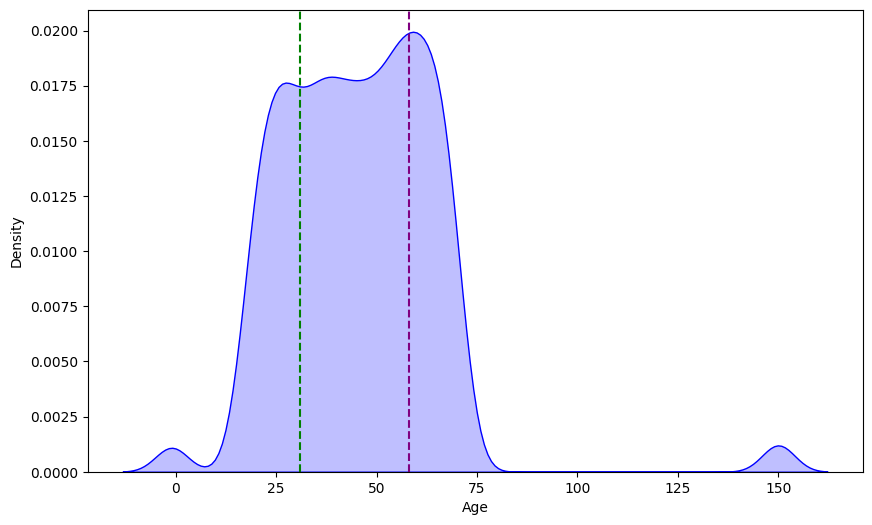

In [16]:
plt.figure(figsize=(10,6))
sns.kdeplot(df_cleaned['Age'], color='blue', shade=True)


plt.axvline(Q1, color='green', linestyle='--', label=f'Q1: {Q1}')
plt.axvline(Q3, color='purple', linestyle='--', label=f'Q3: {Q3}')
plt.axvline(df_cleaned['Age'].mean(), color='red', linestyle='-', label=f'Mean: {df["Age"].mean()}')
plt.axvline(df_cleaned['Age'].mean() - std_dev, color='orange', linestyle='--', label=f'Mean - 1 SD: {df_cleaned["Age"].mean() - std_dev}')
plt.axvline(df_cleaned['Age'].mean() + std_dev, color='orange', linestyle='--', label=f'Mean + 1 SD: {df_cleaned["Age"].mean() + std_dev}')

plt.title('Age Distribution with Variability Metrics')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

In [ ]:
# Remove outliers from the 'Age' column

In [65]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df_filtered = df[(df['Age'] >= 0) & (df['Age'] < 150)]

In [ ]:
# Measures of variability (excluding the outliers)

In [ ]:
# Calculating Range (excluding the outliers)

In [66]:
age_range = df_filtered['Age'].max() - df_filtered['Age'].min()
print(f'Range: {age_range}')

Range: 52.0


In [ ]:
# Calculating Interquartile Range (excluding the outliers)

In [67]:
Q1 = df_filtered['Age'].quantile(0.25)
Q3 = df_filtered['Age'].quantile(0.75)
iqr = Q3 - Q1
print(f'IQR: {iqr}')

IQR: 27.0


In [ ]:
# Calculating Variance and Standard Deviation (excluding the outliers)

In [21]:
variance = df_filtered['Age'].var()
std_dev = df_filtered['Age'].std()

print(f'Variance: {variance}')
print(f'Standard Deviation: {std_dev}')

Variance: 236.8301358005762
Standard Deviation: 15.389286396729908


In [102]:
# Plotting the distribution of the 'Age' column (excluding the outliers)

C:\Users\Acer\AppData\Local\Temp\ipykernel_9988\304187392.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_filtered['Age'], color='blue', shade=True)


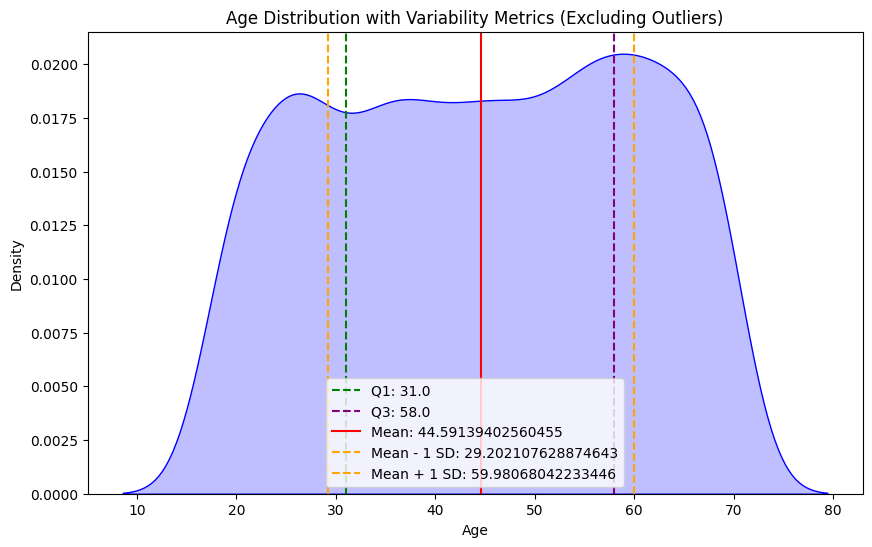

In [22]:
plt.figure(figsize=(10, 6))

sns.kdeplot(df_filtered['Age'], color='blue', shade=True)

Q1_filtered = df_filtered['Age'].quantile(0.25)
Q3_filtered = df_filtered['Age'].quantile(0.75)
mean_filtered = df_filtered['Age'].mean()
std_dev_filtered = df_filtered['Age'].std()

plt.axvline(Q1_filtered, color='green', linestyle='--', label=f'Q1: {Q1_filtered}')
plt.axvline(Q3_filtered, color='purple', linestyle='--', label=f'Q3: {Q3_filtered}')
plt.axvline(mean_filtered, color='red', linestyle='-', label=f'Mean: {mean_filtered}')
plt.axvline(mean_filtered - std_dev_filtered, color='orange', linestyle='--', label=f'Mean - 1 SD: {mean_filtered - std_dev_filtered}')
plt.axvline(mean_filtered + std_dev_filtered, color='orange', linestyle='--', label=f'Mean + 1 SD: {mean_filtered + std_dev_filtered}')

plt.title('Age Distribution with Variability Metrics (Excluding Outliers)')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()


In [156]:
# Plotting BOTH the distribution of the 'Age' column side by side

C:\Users\Acer\AppData\Local\Temp\ipykernel_9988\668453543.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_cleaned['Age'], color='blue', shade=True, ax=axes[0])
C:\Users\Acer\AppData\Local\Temp\ipykernel_9988\668453543.py:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_filtered['Age'], color='blue', shade=True, ax=axes[1])


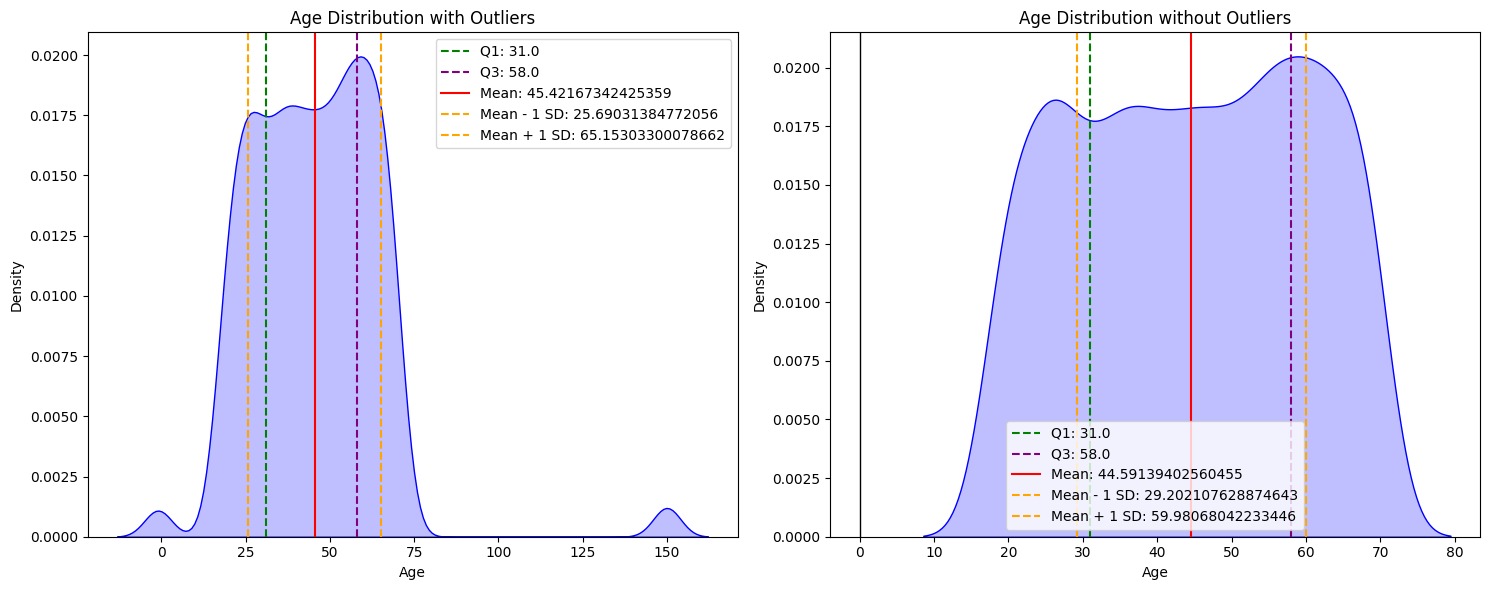

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# First plot: Original data with outliers
sns.kdeplot(df_cleaned['Age'], color='blue', shade=True, ax=axes[0])
Q1 = df_cleaned['Age'].quantile(0.25)
Q3 = df_cleaned['Age'].quantile(0.75)
mean = df_cleaned['Age'].mean()
std_dev = df_cleaned['Age'].std()

axes[0].axvline(Q1, color='green', linestyle='--', label=f'Q1: {Q1}')
axes[0].axvline(Q3, color='purple', linestyle='--', label=f'Q3: {Q3}')
axes[0].axvline(mean, color='red', linestyle='-', label=f'Mean: {mean}')
axes[0].axvline(mean - std_dev, color='orange', linestyle='--', label=f'Mean - 1 SD: {mean - std_dev}')
axes[0].axvline(mean + std_dev, color='orange', linestyle='--', label=f'Mean + 1 SD: {mean + std_dev}')
axes[0].set_title('Age Distribution with Outliers')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Density')
axes[0].legend()

plt.axvline(x=0, color='black', linewidth=1) 

# Second plot: Filtered data without outliers
sns.kdeplot(df_filtered['Age'], color='blue', shade=True, ax=axes[1])
Q1_filtered = df_filtered['Age'].quantile(0.25)
Q3_filtered = df_filtered['Age'].quantile(0.75)
mean_filtered = df_filtered['Age'].mean()
std_dev_filtered = df_filtered['Age'].std()

axes[1].axvline(Q1_filtered, color='green', linestyle='--', label=f'Q1: {Q1_filtered}')
axes[1].axvline(Q3_filtered, color='purple', linestyle='--', label=f'Q3: {Q3_filtered}')
axes[1].axvline(mean_filtered, color='red', linestyle='-', label=f'Mean: {mean_filtered}')
axes[1].axvline(mean_filtered - std_dev_filtered, color='orange', linestyle='--', label=f'Mean - 1 SD: {mean_filtered - std_dev_filtered}')
axes[1].axvline(mean_filtered + std_dev_filtered, color='orange', linestyle='--', label=f'Mean + 1 SD: {mean_filtered + std_dev_filtered}')
axes[1].set_title('Age Distribution without Outliers')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Density')
axes[1].legend()

plt.tight_layout()
plt.show()


In [113]:
# Extract relevant statistics (excluding the outliers)

In [24]:
mean_age = df_filtered['Age'].mean()
median_age = df_filtered['Age'].median()
min_age = df_filtered['Age'].min()
max_age = df_filtered['Age'].max()

print(f"\nBasic statistics for Age (excluding the outliers):")
print(f"Mean: {mean_age}")
print(f"Median: {median_age}")
print(f"Minimum: {min_age}")
print(f"Maximum: {max_age}")


Basic statistics for Age (excluding the outliers):
Mean: 44.59139402560455
Median: 45.0
Minimum: 18.0
Maximum: 70.0


In [114]:
#Frequency Counts

In [25]:
gender_counts = df_cleaned['Gender'].value_counts()
location_counts = df_cleaned['Location'].value_counts()
income_counts = df_cleaned['IncomeLevel'].value_counts()

print("Frequency counts for Gender:")
print(gender_counts)

print("\nFrequency counts for Location:")
print(location_counts)

print("\nFrequency counts for IncomeLevel:")
print(income_counts)

Frequency counts for Gender:
Gender
Female    1528
Male      1495
Name: count, dtype: int64

Frequency counts for Location:
Location
Port Michael          5
North Jennifer        4
Michaelton            4
West Michael          4
Michaelville          4
                     ..
Morenoville           1
East Stuart           1
Colemanstad           1
South Timothyhaven    1
West Jessica          1
Name: count, Length: 2696, dtype: int64

Frequency counts for IncomeLevel:
IncomeLevel
High      946
Low       923
Medium    869
Name: count, dtype: int64


In [48]:

df_filtered['SignupDate'] = pd.to_datetime(df_filtered['SignupDate'], errors='coerce')

income_levels = ['All'] + list(df_filtered['IncomeLevel'].dropna().unique())
signup_years = ['All'] + list(df_filtered['SignupDate'].dt.year.dropna().unique().astype(int))

income_dropdown = Dropdown(
    options=income_levels,
    description='Income Level:',
    layout=Layout(width='250px'), 
)

signup_year_dropdown = Dropdown(
    options=signup_years,
    description='Signup Year:',
    layout=Layout(width='250px'), 
)

@interact(income_level=income_dropdown, signup_year=signup_year_dropdown)
def plot(income_level, signup_year):
    # Apply filtering logic
    filtered_df = df_filtered.copy()

    if income_level != 'All':
        filtered_df = filtered_df[filtered_df['IncomeLevel'] == income_level]
    
    if signup_year != 'All':
        filtered_df = filtered_df[filtered_df['SignupDate'].dt.year == int(signup_year)]
    
    # Group by Age Group and Gender, then count
    age_gender_count = filtered_df.groupby(['AgeGroup', 'Gender'], observed=False).size().unstack(fill_value=0)
 
    # Plotting the results with a wider figure
    plt.figure(figsize=(12, 6))  # Adjusting the width to match the previous graph
    age_gender_count.plot(kind='bar', stacked=False, color=['#1f77b4', '#ff7f0e'])  # Use a distinct color palette
    plt.title('Count of Customers by Age Group and Gender', fontsize=16)
    plt.ylabel('Count', fontsize=12)
    plt.xlabel('Age Group', fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(title='Gender', fontsize=9)
    plt.grid(axis='y', linestyle='--')  # Adjust grid to y-axis
    plt.tight_layout()  # Adjust layout to prevent clipping

    plt.xlim(-0.5, len(age_gender_count.index) - 0.5)  # Adjust x-axis limits
    plt.ylim(0, age_gender_count.max().max() + 5)  # Add space above bars
    plt.show()


C:\Users\Acer\AppData\Local\Temp\ipykernel_9988\3971586978.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['SignupDate'] = pd.to_datetime(df_filtered['SignupDate'], errors='coerce')


interactive(children=(Dropdown(description='Income Level:', layout=Layout(width='250px'), options=('All', 'Low…

In [34]:
# Save the new DataFrame to a new CSV file

In [33]:
df_filtered.to_csv('m1.csv', index=False)